# Maximising the volume of a box

Let us consider a sheet of metal of dimensions $l\times L$

![](../img/sheet/main.png)

We can cut in to the sheet of metal a distance $x$ to create folds.

![](../img/cuts/main.png)

The volume of a box with these folds will be given by:

$V(x) = (l - 2x)\times (L-2x) \times x$

In this notebook we will use calculus (the study of continuous change) and `sympy` to identify the size of the cut to give the biggest volume.

## Defining a function

To help with writing our code, we will start by defining a python function for our volume.

In [1]:
import sympy as sym
sym.init_printing()
x, l, L = sym.symbols("x, l, L")

def V(x=x, l=l, L=L):
    """
    Return the volume of a box as described.
    """
    return (l - 2 * x) * (L - 2 * x) * x

In [2]:
V()

We can use this function to get our value as a function of $L$ and $l$:

In [3]:
V(x=2)

Or we can pass values to all our variables and obtain a given volume:

In [4]:
V(2, l=12, L=14)

### Exercises

- Define the mathematical function $m x ^ 2 - w$

## Plotting our function

Let us start by looking at the volume as a function of $x$ for the following values of $l=20$ and $L=38$:

In [5]:
%matplotlib inline

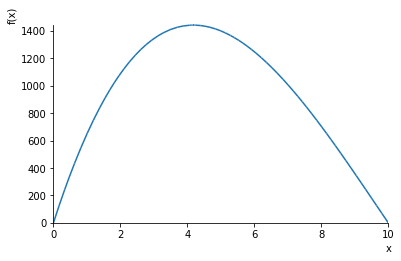

In [6]:
sym.plot(V(x,l=20, L=38), (x, 0, 10));  # We only consider x < min(l, L) / 2

We see that our function has two stationary points (where the graph is flat).

### Exercises

- Obtain a plot of the function $f(x) = x ^ 2$
- Obtain a plot of the function $f(x) = 1 / x$

## Finding stationary points

These stationary points correspond to places where the derivative of the function is 0:

$$
\frac{dV}{dx}=0
$$

Let us find the $\frac{dV}{dx}$ using `sympy`:

In [7]:
first_derivative = V().diff(x)
first_derivative

Let us simplify our output:

In [8]:
first_derivative = first_derivative.simplify()
first_derivative

Now to find the solutions to the equation: 

$$\frac{dV}{dx}=0$$

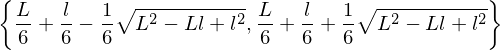

In [9]:
stationary_points = sym.solveset(first_derivative, x)
stationary_points

### Exercises

- Find the stationary points of $f(x)=x^2$
- Find the stationary points of $f(x)=mx^2-w$

## Qualifying stationary points

As we can see in our graph, one of our stationary points is a maximum and the other a minumum. These can be quantified by looking at the second derivative:

- If the second derivative at a stationary point is **positive** then the stationary point is a **local minima**;
- If the second derivative at a stationary point is **negative** then the stationary point is a **local maxima**.

Let us compute the second derivative using `sympy`:

In [10]:
second_derivative = V().diff(x, 2)
second_derivative

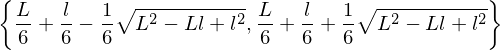

In [11]:
stationary_points

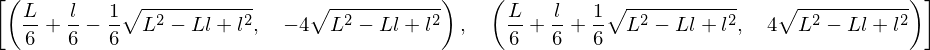

In [12]:
second_derivative_values = [(sol, second_derivative.subs({x: sol})) for sol in stationary_points]
second_derivative_values

We can see that the first solution gives a negative second derivative thus it's a **local** maximum (as we saw in our plot).

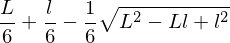

In [13]:
optimal_x = second_derivative_values[0][0]
optimal_x

We can compute the actual value for the running example:

In [14]:
particular_values = {"l": 20, "L": 38}
particular_optimal_x = optimal_x.subs(particular_values)
float(particular_optimal_x), float(V(particular_optimal_x, **particular_values))

### Exercises

- Qualify the stationary points of $f(x)=x^2$
- Qualify the stationary points of $f(x)=mx^2-w$